In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/attack.csv")

# **Step 1: Understand the Dataset**

First, let's understand the features:

age: Age in years

sex: Gender (1 = male; 0 = female)

cp: Chest pain type (0-3)

trestbps: Resting blood pressure (mm Hg)

chol: Serum cholesterol (mg/dl)

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: Resting electrocardiographic results (0-2)

thalach: Maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: Slope of the peak exercise ST segment (0-2)

ca: Number of major vessels colored by fluoroscopy (0-3)

thal: Thalassemia (1-3)

target: Presence of heart disease (1 = yes; 0 = no)

In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# **1. Target Variable Distribution**

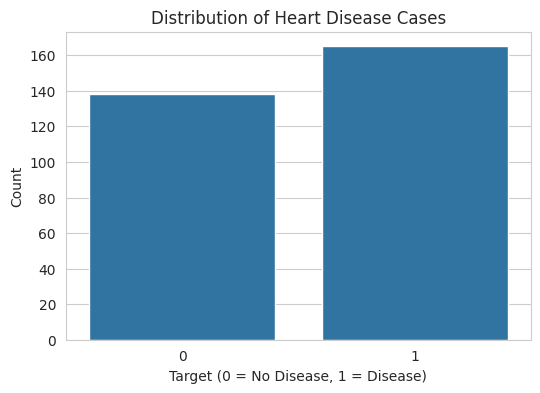

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

# **2. Numerical Features Distribution**

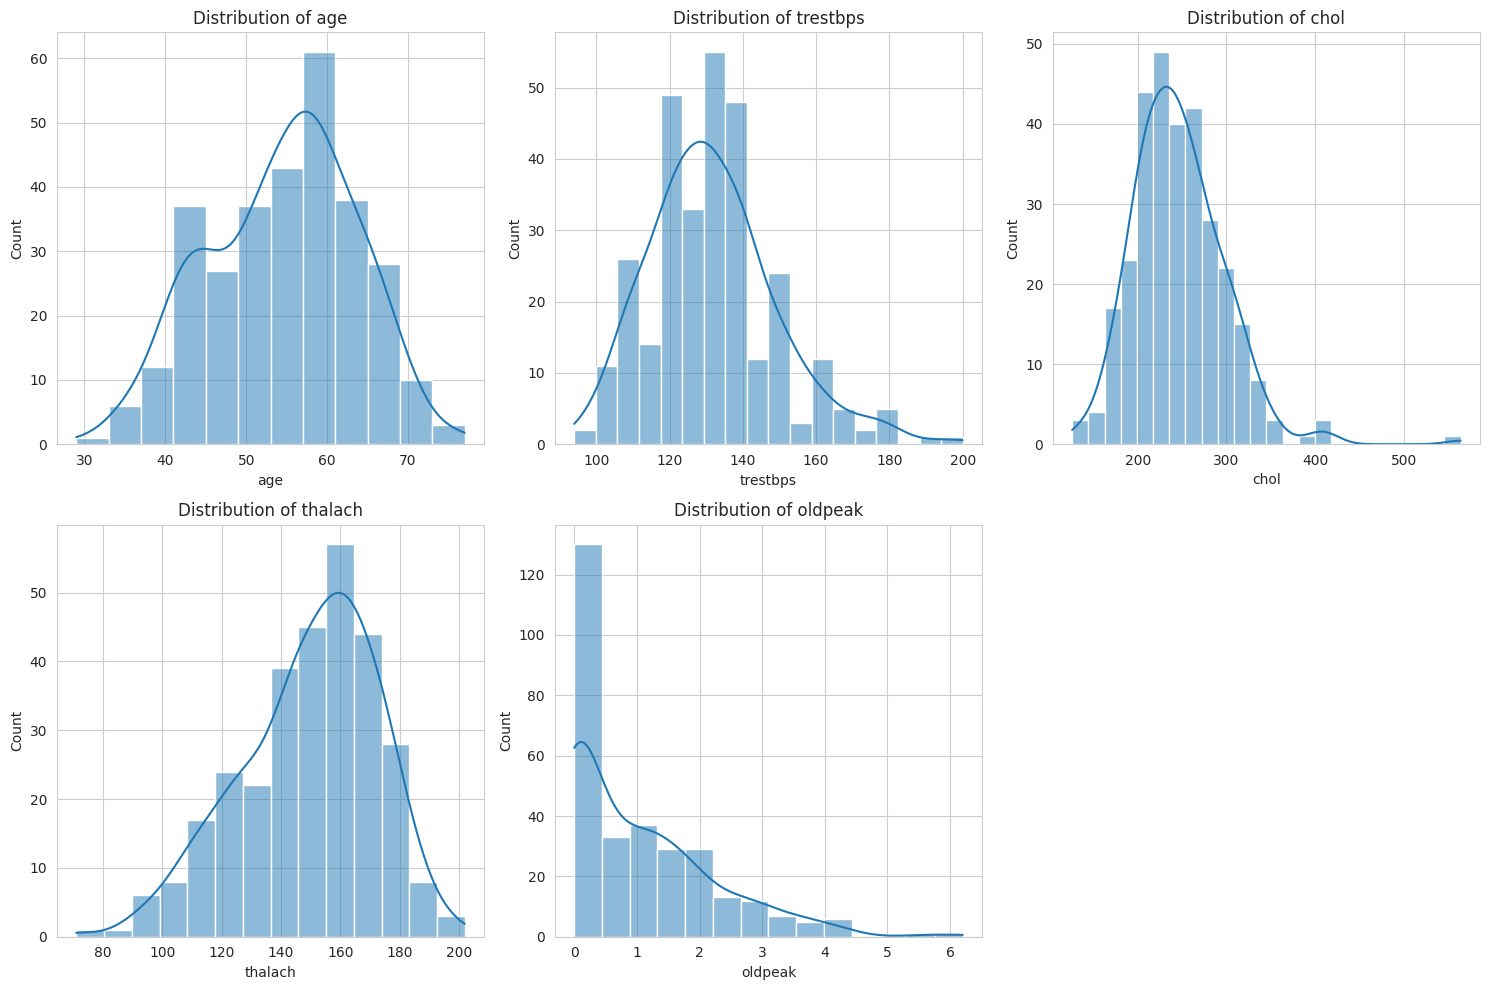

In [9]:
nums_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(nums_cols, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **3. Categorical Features Analysis**

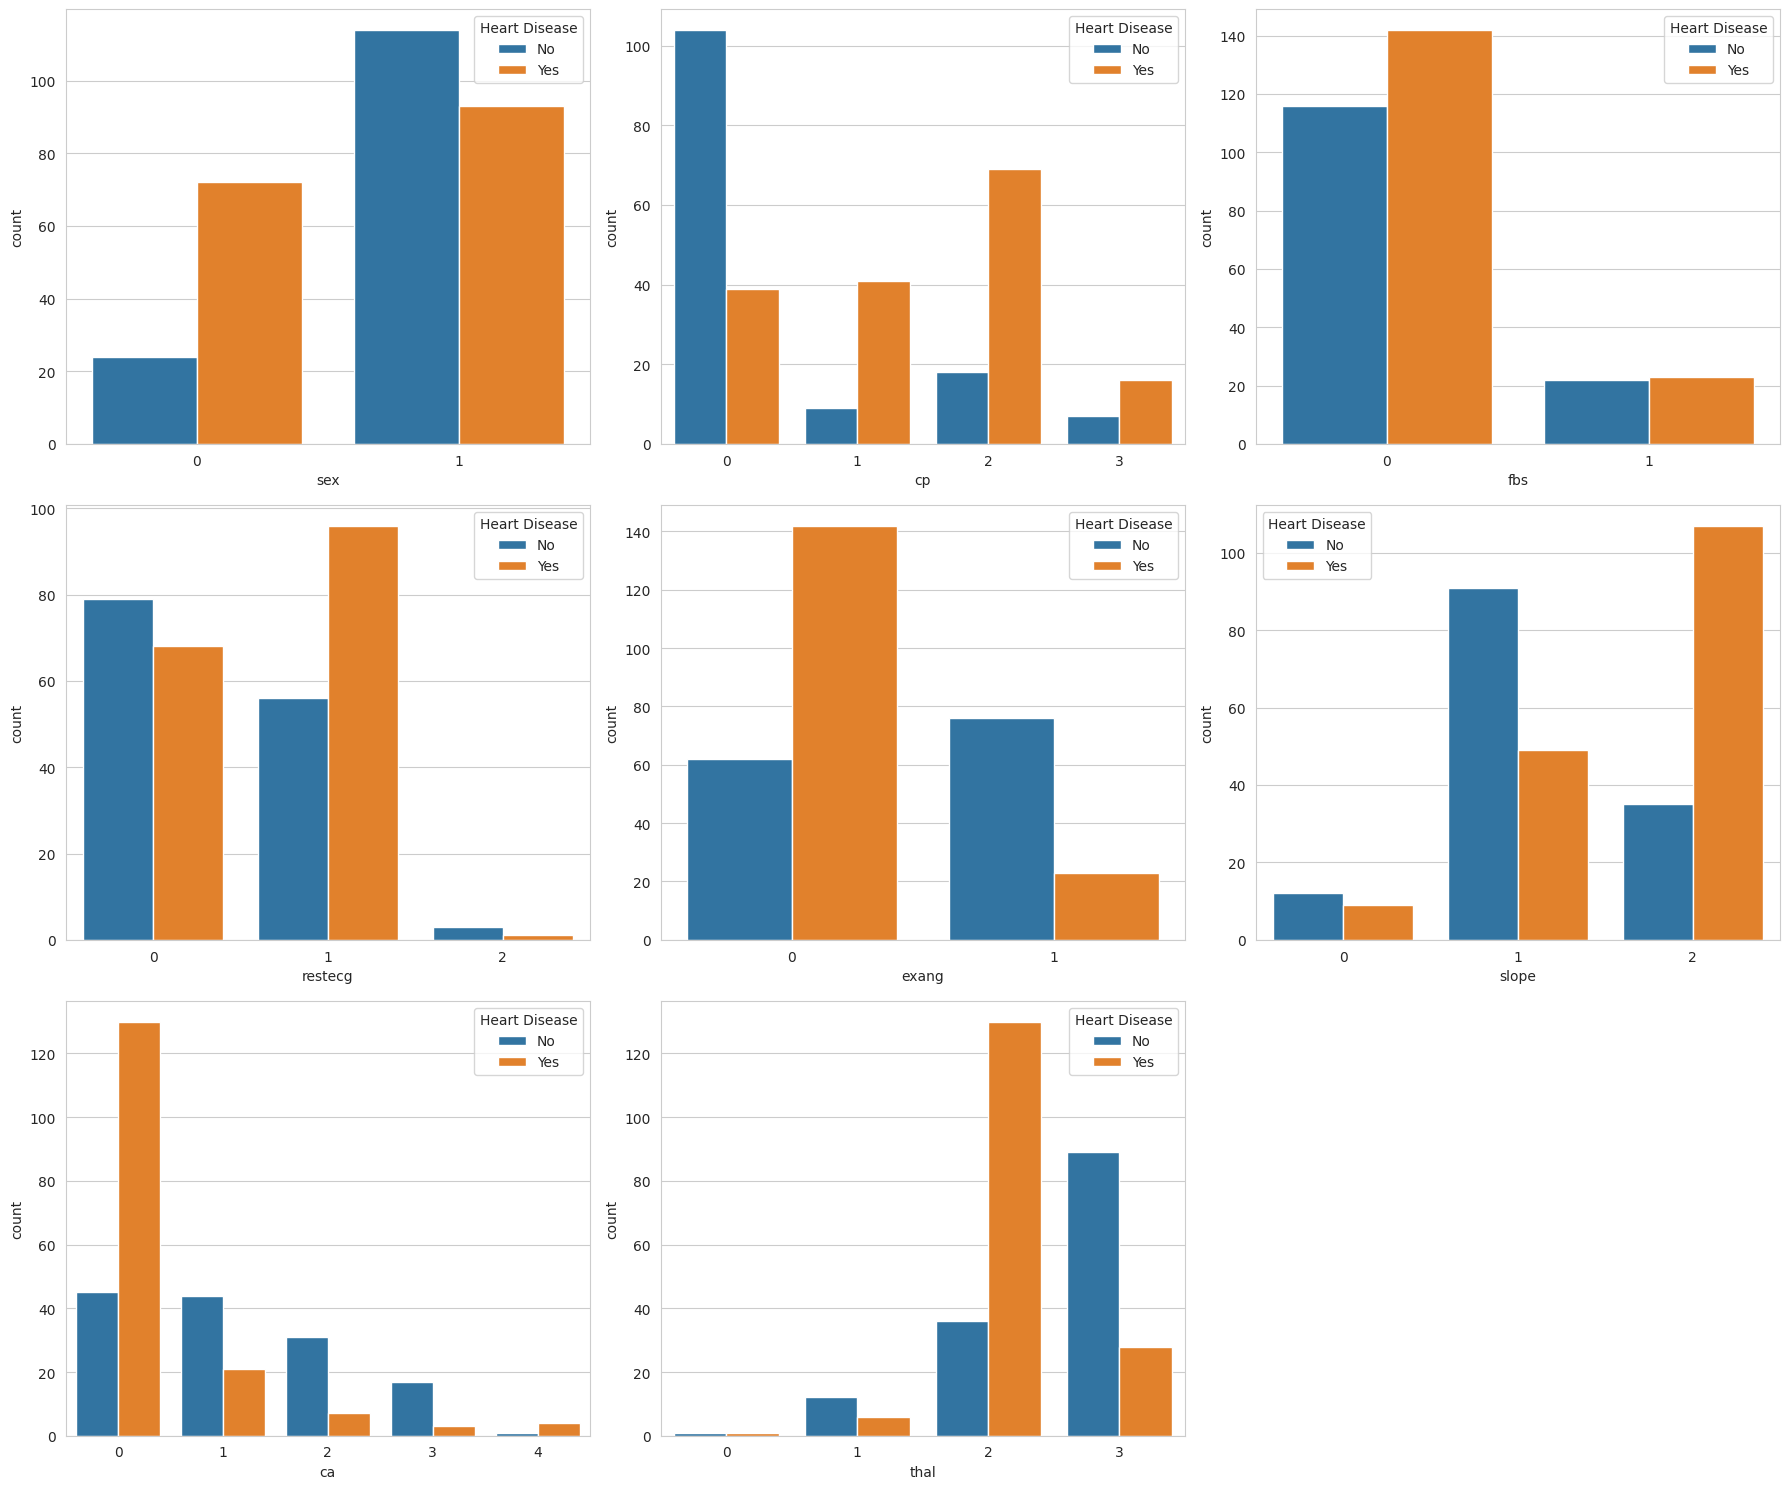

In [11]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(18, 15))
for i, col in enumerate(cat_cols, 1):
  plt.subplot(3, 3, i)
  sns.countplot(x=col, hue='target', data=df)
  plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# **4. Correlation Heatmap**

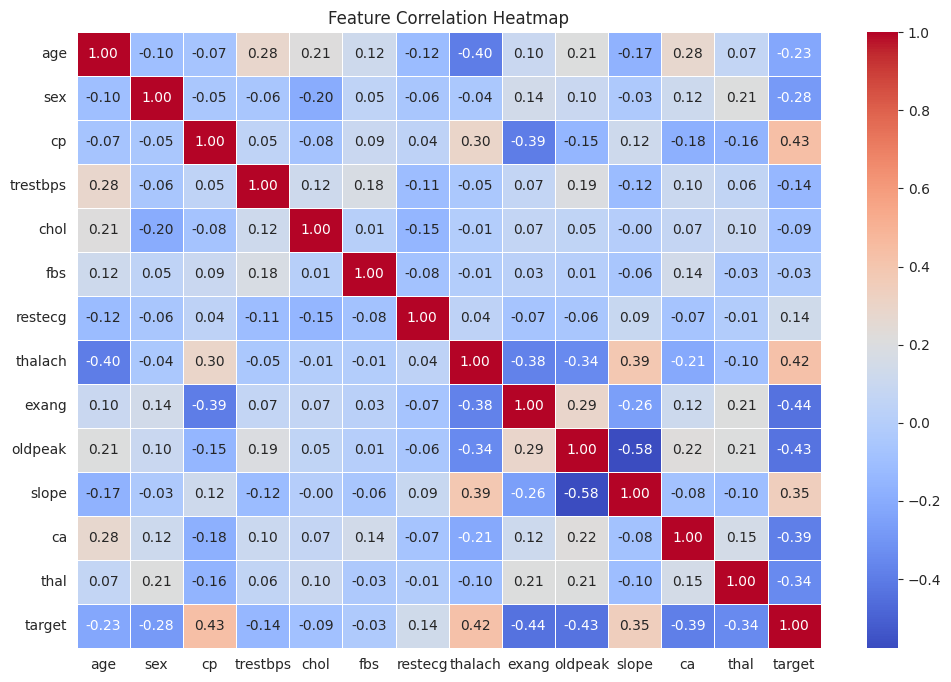

In [13]:
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# **5. Age vs. Heart Disease**

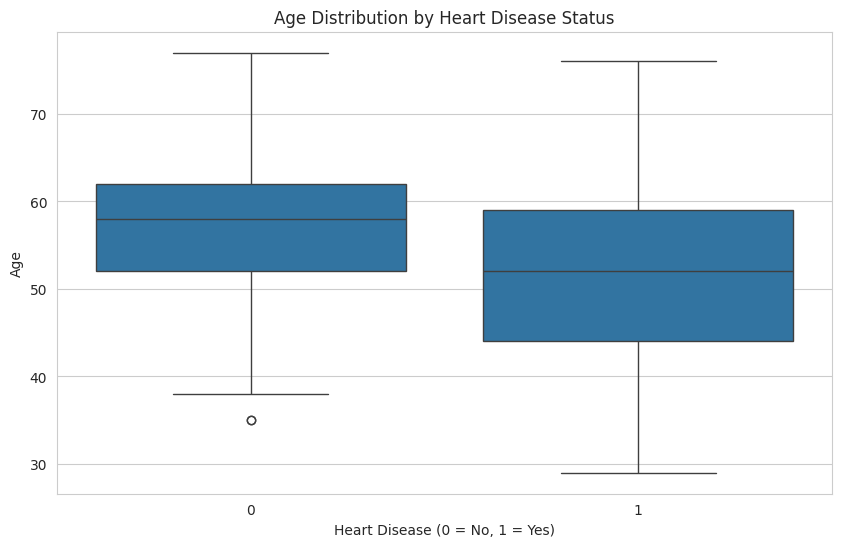

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# **6. Cholesterol vs. Max Heart Rate**

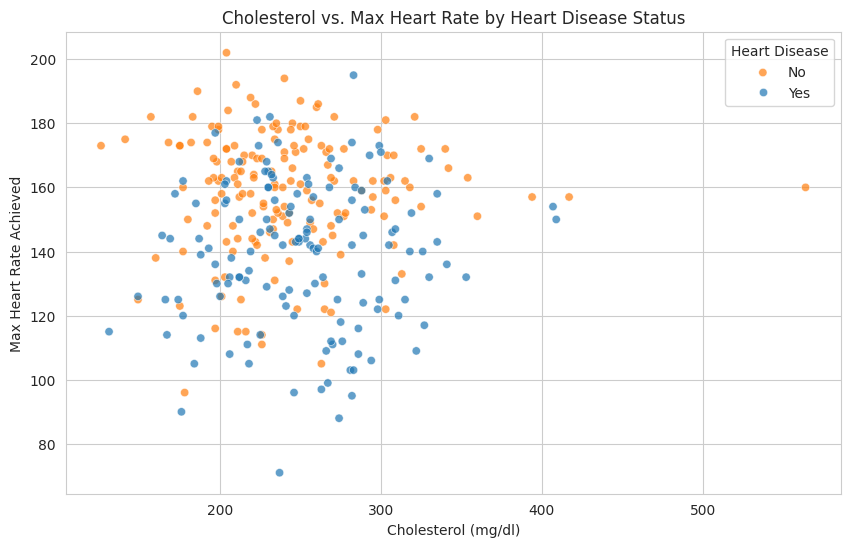

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalach', hue='target', data=df, alpha=0.7)
plt.title('Cholesterol vs. Max Heart Rate by Heart Disease Status')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# **7.Count of Heart Disease by Age Groups**

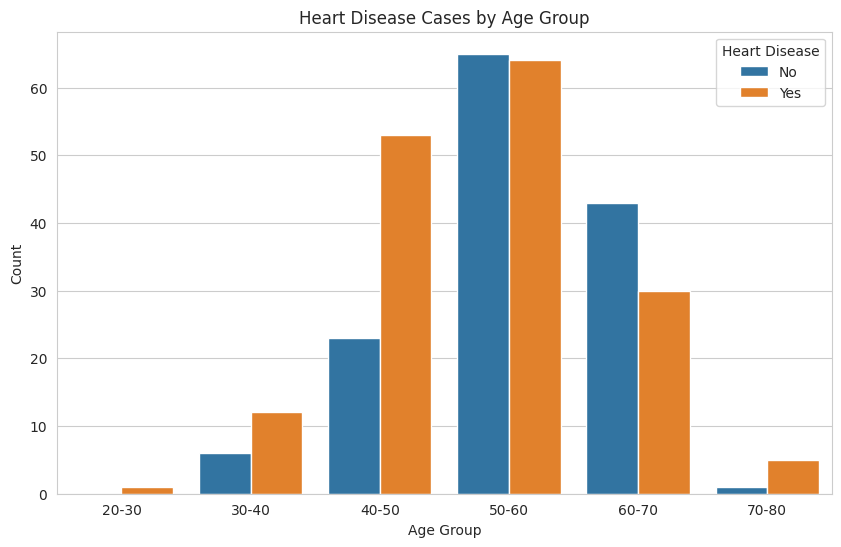

In [16]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80],
                        labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Heart Disease Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [17]:
import plotly.express as px

fig = px.scatter_3d(df, x='age', y='chol', z='thalach',
                    color='target', symbol='sex',
                    title='3D View: Age, Cholesterol, and Max Heart Rate',
                    labels={'target': 'Heart Disease', 'sex': 'Gender'},
                    opacity=0.7)
fig.show()

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [25]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols[:-1]] = scaler.fit_transform(X_train[numeric_cols[:-1]])
X_test_scaled[numeric_cols[:-1]] = scaler.transform(X_test[numeric_cols[:-1]])

In [28]:
print("Scaled Training Data:")
print(X_train_scaled.head())

Scaled Training Data:
          age       sex        cp  trestbps      chol       fbs   restecg  \
132 -1.356798  0.722504  0.008099 -0.616856  0.914034 -0.383301  0.843133   
202  0.385086  0.722504 -0.971891  1.169491  0.439527 -0.383301 -1.046109   
196 -0.921327  0.722504  0.988089  1.169491 -0.300704 -0.383301  0.843133   
75   0.058483 -1.384075  0.008099  0.276318  0.059921 -0.383301 -1.046109   
176  0.602822  0.722504 -0.971891 -0.795490 -0.319684  2.608918  0.843133   

      thalach     exang   oldpeak     slope        ca      thal age_group  
132  0.532781 -0.676632 -0.920864  0.953905 -0.689701 -0.509048     40-50  
202 -1.753582  1.477907 -0.193787  0.953905 -0.689701  1.178480     50-60  
196 -0.139679 -0.676632  2.350982 -0.694988 -0.689701 -0.509048     40-50  
75   0.487950 -0.676632  0.351521 -0.694988 -0.689701 -0.509048     50-60  
176  0.443119  1.477907  0.351521  0.953905  1.333421  1.178480     50-60  


In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [31]:
# First, ensure you're only using numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target from numeric columns (since it's our y)
numeric_cols.remove('target')

# Now select only numeric columns for X
X = df[numeric_cols]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[25  4]
 [ 5 27]]

SVM Performance:
Accuracy: 0.8689
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[26  3]
 [ 5 27]]

Random Forest Performance:
Accuracy: 0.8361
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.8